### Assignment: ASSIGNMENT 5 <br>Name: Hotaling, Michael<br>Date: 2010-02-14

In [1]:
library(psych)
library(ggplot2)

Warning message:
"package 'psych' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



In [2]:
setwd("..")
setwd("..")

Load the `data/r4ds/heights.csv` to `heights_df`

In [3]:
heights_df <- read.csv("data/r4ds/heights.csv")
head(heights_df)

,earn,height,sex,ed,age,race
,<dbl>,<dbl>,<fct>,<int>,<int>,<fct>
1,50000,74.42444,male,16,45,white
2,60000,65.53754,female,16,58,white
3,30000,63.62920,female,16,29,white
4,50000,63.10856,female,16,91,other
5,51000,63.40248,female,17,39,white
6,9000,64.39951,female,15,26,white


Using `cor()` compute correclation coefficients for<br>**height vs. earn**

In [4]:
cor(heights_df$height, heights_df$earn)

[1] 0.2418481

**age vs. earn**

In [5]:
cor(heights_df$age, heights_df$earn)

[1] 0.08100297

**ed vs. earn**

In [6]:
cor(heights_df$ed, heights_df$earn)

[1] 0.3399765

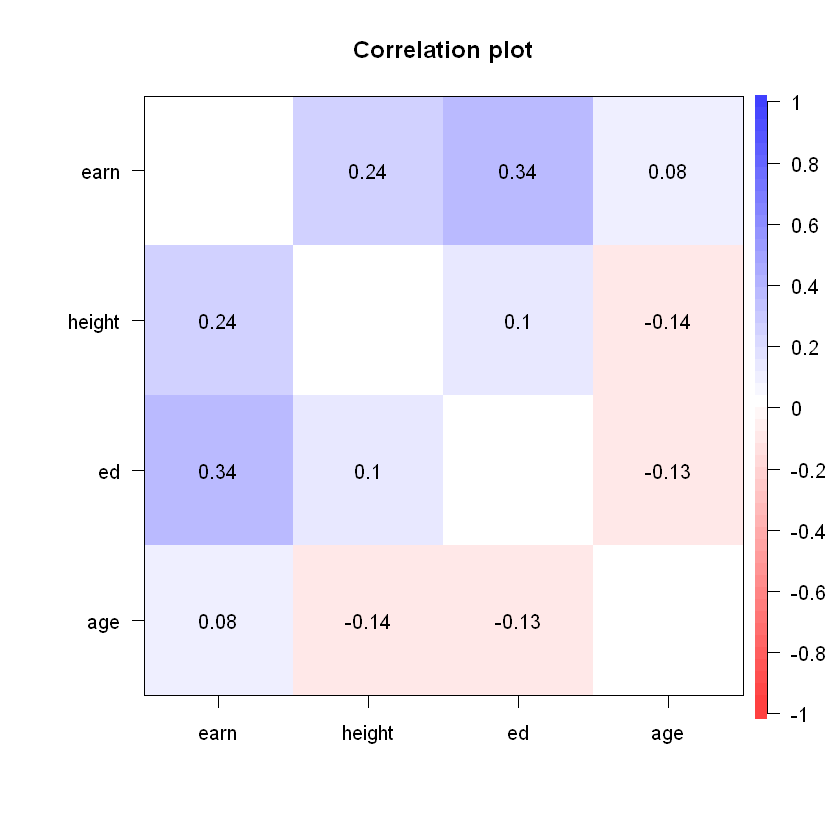

In [7]:
cor.plot(subset(heights_df, 
                select = -c(sex, race)), 
         scale = FALSE, 
         diag = FALSE, 
         cex = 1)

**Spurious correlation**

The following is data on US spending on science, space, and technology in millions of today's dollars and suicides by hanging strangulation and suffocation for the years 1999 to 2009<br>Compute the correlation between these variables

In [8]:
tech_spending <- c(18079, 18594, 19753, 20734, 20831, 23029, 23597, 23584, 25525, 27731, 29449)
suicides <- c(5427, 5688, 6198, 6462, 6635, 7336, 7248, 7491, 8161, 8578, 9000)

In [9]:
cor(tech_spending, suicides)

[1] 0.9920817

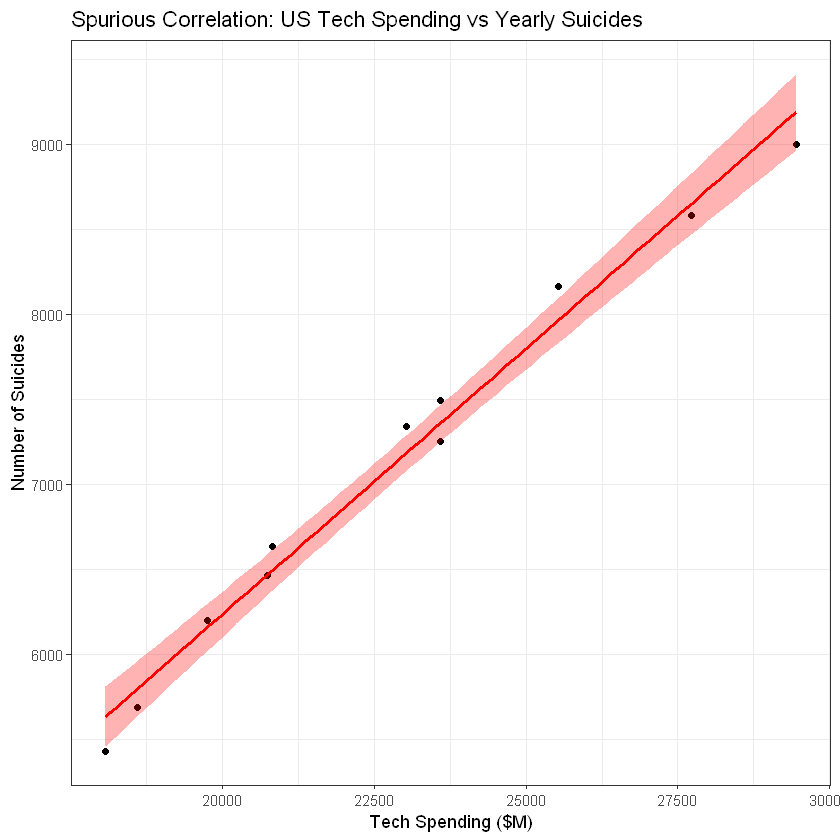

In [19]:
df2 <- data.frame(tech_spending, suicides)
ggplot(data = df2, aes(x = tech_spending, y = suicides)) +
geom_point() + 
geom_smooth(method = "lm", 
            formula = y ~ x, 
            color = 'red', 
            fill = "red", 
            alpha = 0.3, 
            level = 0.95) + 
xlab("Tech Spending ($M)") + 
ylab("Number of Suicides") + 
ggtitle("Spurious Correlation: US Tech Spending vs Yearly Suicides") +
theme_bw()

In [11]:
lm_model <- lm(suicides ~ tech_spending, df2)

In [12]:
summary(lm_model)


Call:
lm(formula = suicides ~ tech_spending, data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-204.964 -107.248   -0.204  140.020  200.611 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -21.4897   304.5154  -0.071    0.945    
tech_spending   0.3127     0.0132  23.697 2.02e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 153.1 on 9 degrees of freedom
Multiple R-squared:  0.9842,	Adjusted R-squared:  0.9825 
F-statistic: 561.6 on 1 and 9 DF,  p-value: 2.025e-09
